In [1]:
!wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip -P data
!cd data && unzip PennFudanPed.zip

--2024-11-11 21:40:11--  https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip
Resolving www.cis.upenn.edu (www.cis.upenn.edu)... 158.130.69.163, 2607:f470:8:64:5ea5::d
Connecting to www.cis.upenn.edu (www.cis.upenn.edu)|158.130.69.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53723336 (51M) [application/zip]
Saving to: ‘data/PennFudanPed.zip’

PennFudanPed.zip    100%[===================>]  51.23M  4.26MB/s    in 14s     

2024-11-11 21:40:26 (3.70 MB/s) - ‘data/PennFudanPed.zip’ saved [53723336/53723336]

Archive:  PennFudanPed.zip
   creating: PennFudanPed/
  inflating: PennFudanPed/added-object-list.txt  
   creating: PennFudanPed/Annotation/
  inflating: PennFudanPed/Annotation/FudanPed00001.txt  
  inflating: PennFudanPed/Annotation/FudanPed00002.txt  
  inflating: PennFudanPed/Annotation/FudanPed00003.txt  
  inflating: PennFudanPed/Annotation/FudanPed00004.txt  
  inflating: PennFudanPed/Annotation/FudanPed00005.txt  
  inflating: PennFudanPe

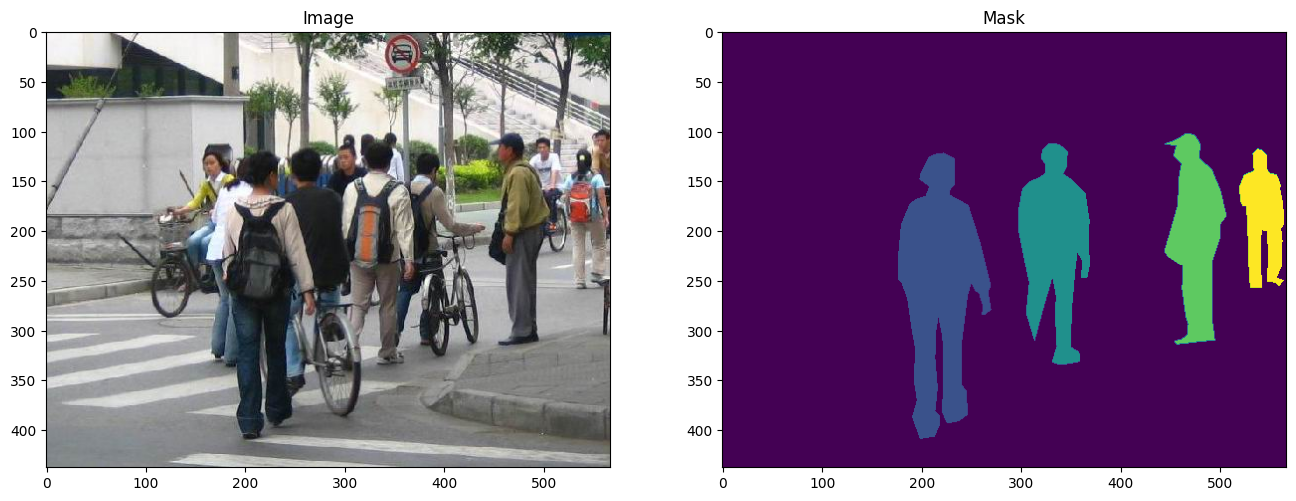

In [2]:
import matplotlib.pyplot as plt
from torchvision.io import read_image


image = read_image("data/PennFudanPed/PNGImages/FudanPed00046.png")
mask = read_image("data/PennFudanPed/PedMasks/FudanPed00046_mask.png")

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Image")
plt.imshow(image.permute(1, 2, 0))
plt.subplot(122)
plt.title("Mask")
plt.imshow(mask.permute(1, 2, 0))

In [2]:
import os

os.system(
    "wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py"
)
os.system(
    "wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py"
)
os.system(
    "wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py"
)
os.system(
    "wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py"
)
os.system(
    "wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py"
)

--2024-11-11 11:12:27--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4063 (4.0K) [text/plain]
Saving to: ‘engine.py’

     0K ...                                                   100% 20.4M=0s

2024-11-11 11:12:27 (20.4 MB/s) - ‘engine.py’ saved [4063/4063]

--2024-11-11 11:12:27--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8388 (8.2K) [text/plain]
Savin

0

In [6]:
import torch
from torchvision.transforms import v2 as T


def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

get_transform(train=True)(image)

tensor([[[0.9686, 0.9686, 0.9686,  ..., 0.0824, 0.0667, 0.0667],
         [0.9647, 0.9686, 0.9686,  ..., 0.0706, 0.0510, 0.0471],
         [0.9647, 0.9647, 0.9686,  ..., 0.0863, 0.0784, 0.0824],
         ...,
         [0.5098, 0.5098, 0.5098,  ..., 0.5333, 0.5255, 0.5255],
         [0.5176, 0.5176, 0.5137,  ..., 0.4745, 0.4784, 0.4824],
         [0.5137, 0.5098, 0.5098,  ..., 0.4510, 0.4549, 0.4510]],

        [[0.9608, 0.9608, 0.9608,  ..., 0.1843, 0.1686, 0.1686],
         [0.9569, 0.9608, 0.9608,  ..., 0.1765, 0.1608, 0.1569],
         [0.9569, 0.9569, 0.9608,  ..., 0.1961, 0.1922, 0.1961],
         ...,
         [0.5333, 0.5333, 0.5333,  ..., 0.5412, 0.5333, 0.5333],
         [0.5412, 0.5412, 0.5373,  ..., 0.4824, 0.4863, 0.4902],
         [0.5373, 0.5333, 0.5333,  ..., 0.4588, 0.4627, 0.4588]],

        [[0.9647, 0.9647, 0.9647,  ..., 0.4235, 0.4078, 0.4000],
         [0.9608, 0.9647, 0.9647,  ..., 0.3843, 0.3569, 0.3529],
         [0.9608, 0.9608, 0.9647,  ..., 0.3412, 0.3255, 0.

/tmp/ipykernel_16852/2225066155.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weight = torch.load("../../model_round_3.pth")


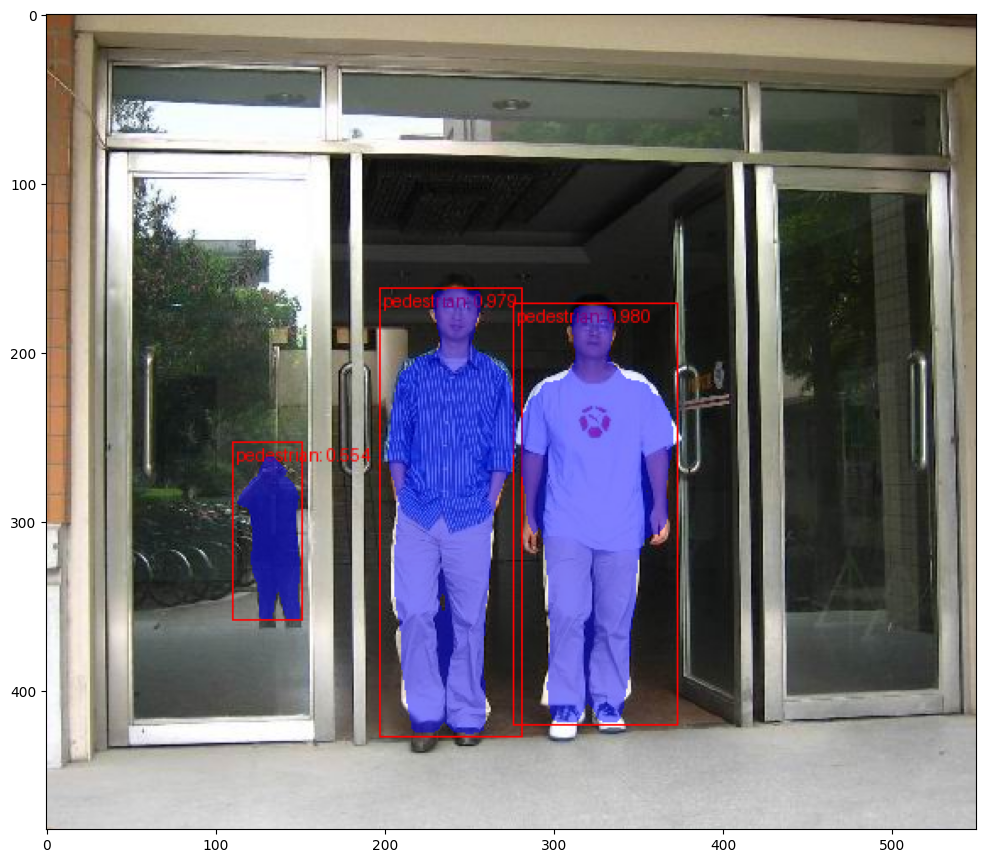

In [16]:
import matplotlib.pyplot as plt

from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks

from model import RNNModel

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
weight = torch.load("../../model_round_3.pth")

model = RNNModel()
model = model.get_model_instance_segmentation(num_classes=2)
model.load_state_dict(weight)
model.to(device)

image = read_image("data/PennFudanPed/PNGImages/FudanPed00040.png")
eval_transform = get_transform(train=False)

model.eval()
with torch.no_grad():
    x = eval_transform(image)
    # convert RGBA -> RGB and move to device
    x = x[:3, ...].to(device)
    predictions = model(
        [
            x,
        ]
    )
    pred = predictions[0]


image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
image = image[:3, ...]
pred_labels = [
    f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])
]
pred_boxes = pred["boxes"].long()
output_image = draw_bounding_boxes(image, pred_boxes, pred_labels, colors="red")

masks = (pred["masks"] > 0.7).squeeze(1)
output_image = draw_segmentation_masks(output_image, masks, alpha=0.5, colors="blue")


plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))